In [6]:
import tensorflow as tf
import numpy as np
import os,pickle,cv2
import matplotlib.pyplot as plt

In [7]:
import time

In [8]:
data=np.load("cat_dog_data.npy",allow_pickle=True)

In [9]:
data[0][0].shape



(376, 500, 3)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

ModuleNotFoundError: No module named 'tensorflow'

In [11]:
model = Sequential()

model.add(Conv2D(filters=24, kernel_size=3,input_shape=(320, 320, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))#1
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))#2
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1164, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 318, 24)      672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 159, 24)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 157, 36)      7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 78, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 48)        15600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)        2

In [7]:
datax=[]
datay=[]

In [8]:
data.shape

(100, 2)

In [9]:
for i in range(100):
    datax.append(cv2.resize(data[i][0],(320,320))/255)
    datay.append(data[i][1])
data=[]

In [91]:
np.save("datax.npy",np.array(datax,dtype=object))
np.save("datay.npy",np.array(datay,dtype=object))

In [10]:
datax=np.array(datax,dtype='float32')
datay=np.array(datay,dtype='float32')

In [11]:
datax[0].shape

(320, 320, 3)

In [12]:
for i in range(100):
    print(datay[i])

0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0


0.0

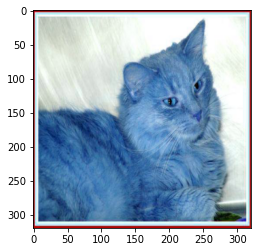

In [13]:
# datax[0].shape
plt.imshow(datax[1])
datay[1]

In [29]:
start=time.time()
model.fit(datax,datay,
         batch_size=50,
    epochs=10,
          validation_split=0.1
     )
end=time.time()
print(end-start)

Epoch 1/10
2/2 [==============================] - 0s 207ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 191ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 185ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 0s 188ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 5/10
2/2 [==============================] - 0s 188ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 0s 184ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 7/10
2/2 [==============================] - 0s 179ms/step - loss: nan - accuracy: 0.4778 - val_loss: nan - val_accuracy: 0.6000
Epoch 8/10
2/2 [==============================] - 0s 179ms/ste

In [15]:
predictions = model.predict_classes(datax)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
c=0
for i in range(100):
    if datay[i]!=predictions[0] :
        print("hey")
        c+=1

hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


In [17]:
c

49